In [5]:
## Create a Chatbot with tool capabilities from arxiv, wikipedia search, Taviliy and some functions. 
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun 
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

from dotenv import load_dotenv
load_dotenv()

import os
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Prompt-Chaining"

In [6]:
## Initialize the LLM
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b") 


In [7]:
### Entier Chatbot with LangGraph 

from typing_extensions import Annotated, TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages 

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END 

## Graph State 
class State(TypedDict):
    topic: str
    story: str 
    imporved_story: str
    final_story: str 

## Nodes 

def generateStory(state: State):
    msg = llm.invoke(f"Write a one sentence story premise about {state['topic']}")
    return {"story": msg.content}

def check_conflict(state: State) -> str: 
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail" 
    else:
        return "Pass"
    
def improve_story(state: State): 
    msg = llm.invoke(f"Enhance this story premise with vivid details: {state['story']}" )
    return {"imporved_story": msg.content} 

def polish_story(state: State): 
    msg = llm.invoke(f"Add unexpected twist to this story premise: {state['imporved_story']}" )
    return {"final_story": msg.content}



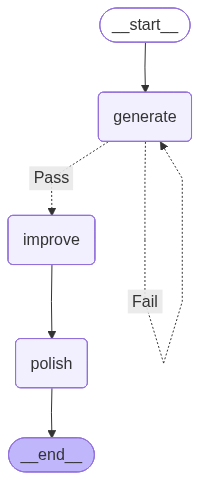

In [8]:
## Build the graph. 

graph=StateGraph(State)
graph.add_node("generate", generateStory)
graph.add_node("improve", improve_story)
graph.add_node("polish", polish_story)

graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass": "improve", "Fail": "generate"})
graph.add_edge("improve", "polish")
graph.add_edge("polish", END)

graph_builder = graph.compile() 
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [ ]:
## Run the graph 

state = {"topic": "Diwali festival in India"}

result_messages = graph_builder.invoke(state)



'<think>\nOkay, let\'s see. The user wants me to add an unexpected twist to the Diwali story premise they provided. The original premise is about a grandmother and her grandson in Mumbai uncovering a treasure using rangoli patterns, with the treasure being a brass oil lamp. The enhanced version I came up with included more vivid details and some cultural elements.\n\nNow, for the twist. The user wants something unexpected. The original story\'s main elements are tradition vs. modernity, family bonding, and a hidden family treasure. To make the twist unexpected, I need to subvert some of these elements. Maybe the treasure isn\'t what it seems, or the grandmother isn\'t just a passive storyteller. Perhaps the treasure has a dangerous side, or the real conflict is internal rather than external.\n\nLooking at the example response the assistant gave, they included a twist where the treasure is a cursed artifact that requires a sacrifice. The grandmother had to choose between the treasure an

In [19]:
print(result_messages["imporved_story"])

<think>
Okay, let's see. The user wants a one-sentence story premise about Diwali in India. They already provided an example, but they want me to enhance it with vivid details. First, I need to understand what they mean by "vivid details." Probably adding sensory elements, specific settings, and maybe more emotional depth.

The original example was about a young girl discovering a forgotten legend. The enhanced version the user gave involves a grandmother and grandson in Mumbai, decoding rangoli patterns. So maybe they want more rich imagery and specific cultural elements. Let me think about Diwali elements: diyas, fireworks, rangoli, family gatherings, maybe the setting like a courtyard, the smell of incense, the sound of crackers.

I should focus on creating a vivid scene that engages the senses. Maybe add more about the setting—like a specific location within Mumbai, maybe a heritage home. The grandmother's background could be more detailed—perhaps she's a storyteller or has a perso